In [ ]:
from PIL import Image
import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt
import cv2 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

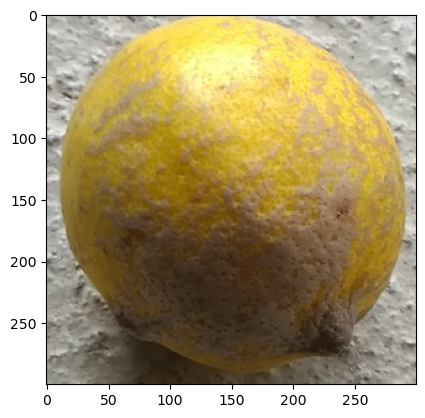

In [54]:
img=cv2.imread('Lemon_quality/Lemon_quality/bad_quality/bad_quality_935.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

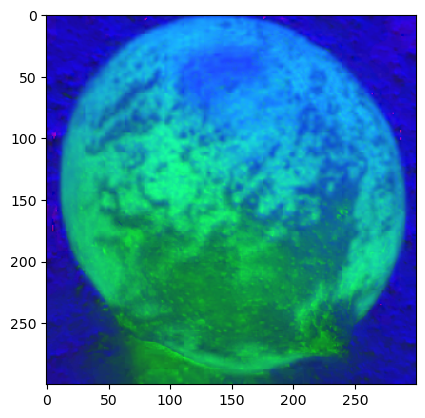

In [56]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img)

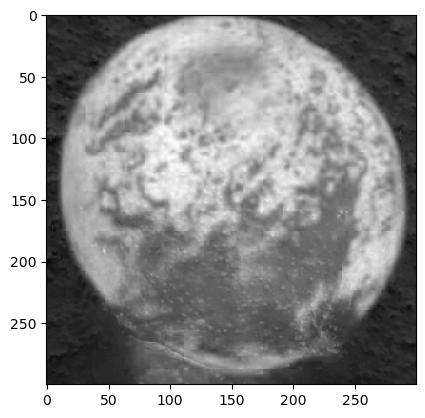

In [57]:
gray_img = cv2.cvtColor(hsv_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

In [71]:
def readImg(img):
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv_img= cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    gray_img = cv2.cvtColor(hsv_img, cv2.COLOR_BGR2GRAY)
    return img, gray_img

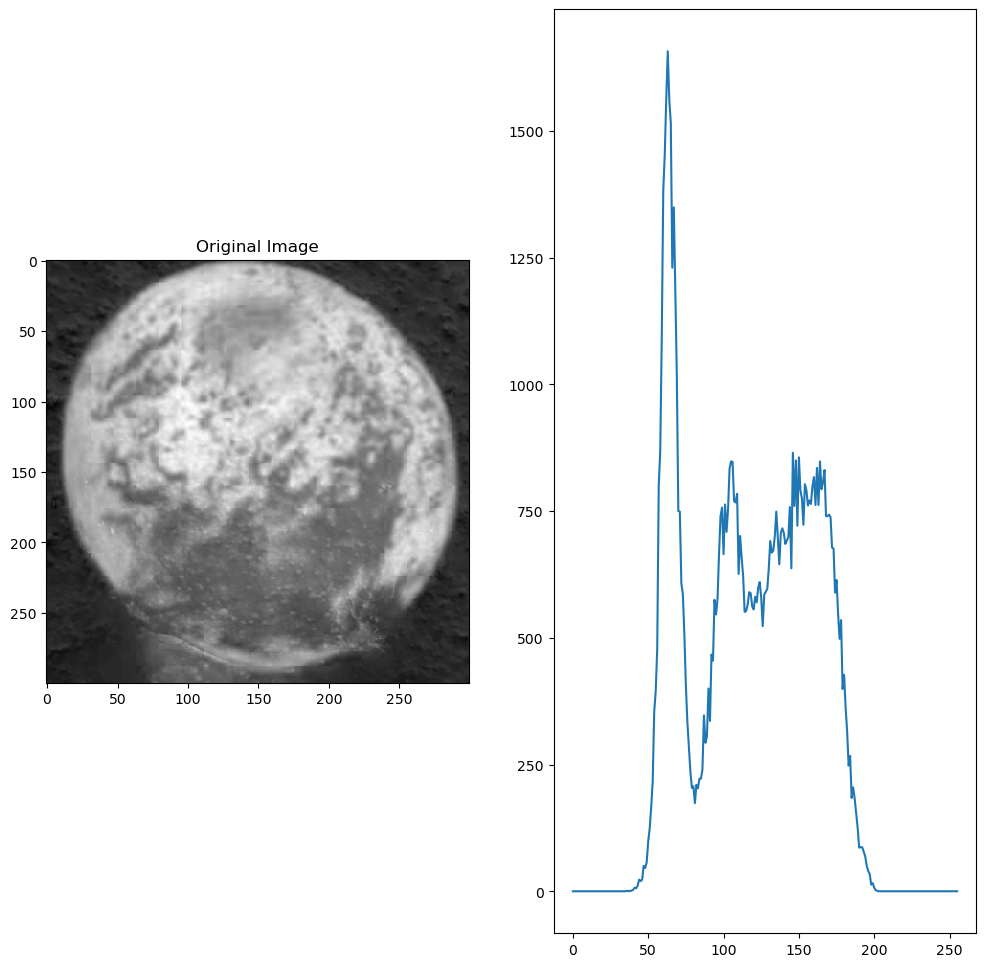

In [58]:
hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.plot(hist)

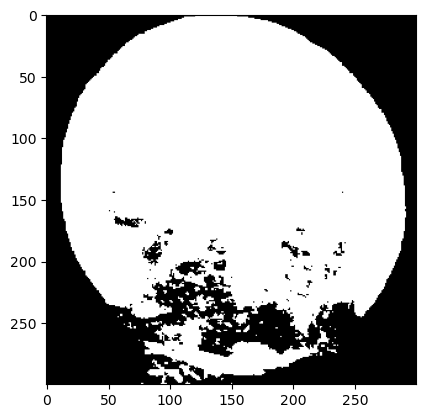

In [59]:
ret,th = cv2.threshold(gray_img,100,200,cv2.THRESH_BINARY)
plt.imshow(th, cmap='gray')

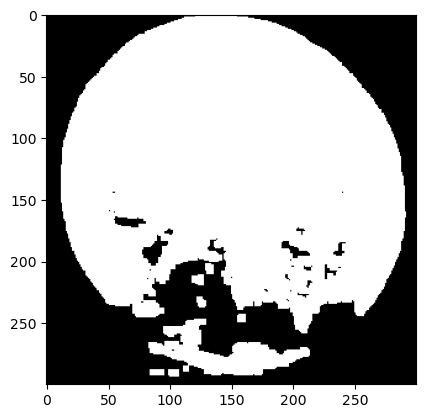

In [60]:
kernel = np.ones((3, 3),)
fnal= cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel, iterations=2)
plt.imshow(fnal, cmap='gray')


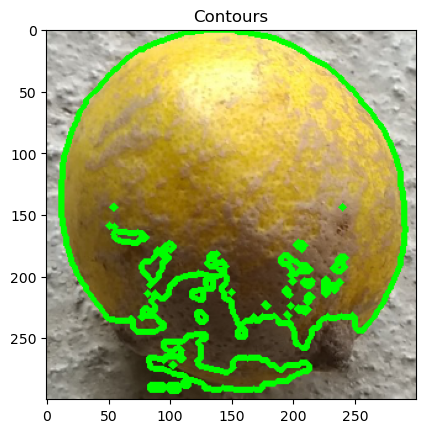

In [61]:
contours, hierarchy = cv2.findContours(fnal, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_img = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.show()

In [62]:
perimeter = cv2.arcLength(contours[0], True)
print('Perimeter:', perimeter)
area = cv2.contourArea(contours[0])
print('Area:', area)

Perimeter: 25.41421353816986
Area: 39.5


In [63]:
area = cv2.contourArea(contours[0])
print('Area:', area)

Area: 39.5


In [42]:
def get_countour_area(gray_img):
    ret,th = cv2.threshold(gray_img,100,200,cv2.THRESH_BINARY)
    kernel = np.ones((3, 3),)
    fnal= cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel, iterations=2)
    contours, hierarchy = cv2.findContours(fnal, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    perimeter = cv2.arcLength(contours[0], True)
    area = cv2.contourArea(contours[0])
    return perimeter,area

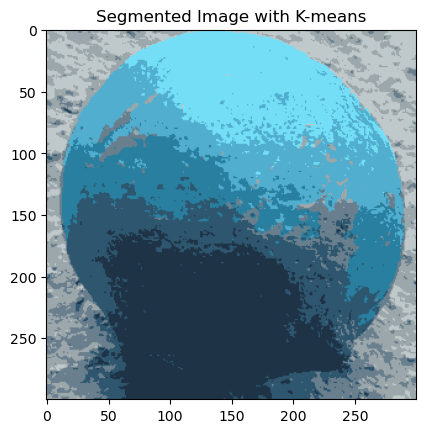

In [70]:

pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 8  # Number of clusters
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
labels = labels.flatten()

segmented_image = centers[labels.flatten()]


segmented_image = segmented_image.reshape(img.shape)

# Plot the segmented image
plt.imshow(segmented_image)
plt.title('Segmented Image with K-means')
plt.show()

In [75]:
def get_colors(img):
    pixel_values = img.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 8  # Number of clusters
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    return centers

In [ ]:
import os

image_dir = 'Lemon_quality/Lemon_quality/bad_quality/'


data = []

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg'):
        img_path = os.path.join(image_dir, filename)
        img, gray_img = readImg(img_path)
        perimeter, area = get_countour_area(gray_img)
        centers = get_colors(img)
        quality = 'bad'  
        data.append({'Perimeter': perimeter, 'Area': area, 'Quality': quality, 'Centers': centers.tolist()})

df_lemon = pd.DataFrame(data)
print(df_lemon)

       Perimeter     Area Quality  \
0    1010.582821  69276.0     bad   
1     967.879284  61132.5     bad   
2    1115.778779  62127.0     bad   
3      12.000000      8.0     bad   
4    1056.724957  76029.0     bad   
..           ...      ...     ...   
946    31.899495     61.5     bad   
947   730.097540  36443.0     bad   
948   974.322937  58586.0     bad   
949   860.925967  44905.0     bad   
950   967.796024  60203.5     bad   

                                               Centers  
0    [[177, 151, 48], [140, 137, 127], [193, 168, 9...  
1    [[178, 176, 165], [81, 64, 28], [185, 164, 85]...  
2    [[126, 113, 89], [79, 56, 13], [193, 173, 54],...  
3    [[107, 89, 20], [146, 142, 129], [61, 50, 22],...  
4    [[240, 223, 106], [174, 170, 160], [91, 72, 25...  
..                                                 ...  
946  [[178, 176, 169], [160, 128, 35], [226, 202, 1...  
947  [[157, 98, 7], [243, 184, 17], [59, 43, 26], [...  
948  [[103, 74, 11], [69, 52, 21], [174, 1

In [81]:
df_lemon

,Perimeter,Area,Quality,Centers
0,1010.582821,69276.0,bad,"[[177, 151, 48], [140, 137, 127], [193, 168, 9..."
1,967.879284,61132.5,bad,"[[178, 176, 165], [81, 64, 28], [185, 164, 85]..."
2,1115.778779,62127.0,bad,"[[126, 113, 89], [79, 56, 13], [193, 173, 54],..."
3,12.000000,8.0,bad,"[[107, 89, 20], [146, 142, 129], [61, 50, 22],..."
4,1056.724957,76029.0,bad,"[[240, 223, 106], [174, 170, 160], [91, 72, 25..."
...,...,...,...,...
946,31.899495,61.5,bad,"[[178, 176, 169], [160, 128, 35], [226, 202, 1..."
947,730.097540,36443.0,bad,"[[157, 98, 7], [243, 184, 17], [59, 43, 26], [..."
948,974.322937,58586.0,bad,"[[103, 74, 11], [69, 52, 21], [174, 147, 60], ..."
949,860.925967,44905.0,bad,"[[184, 183, 176], [104, 101, 82], [161, 159, 1..."


In [ ]:

image_dir = 'Lemon_quality/Lemon_quality/good_quality/'


data = []

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg'):
        img_path = os.path.join(image_dir, filename)
        img, gray_img = readImg(img_path)
        perimeter, area = get_countour_area(gray_img)
        centers = get_colors(img)
        quality = 'good' 
        data.append({'Perimeter': perimeter, 'Area': area, 'Quality': quality, 'Centers': centers.tolist()})


df_lemon1 = pd.DataFrame(data)
print(df_lemon1)

        Perimeter     Area Quality  \
0      917.879285  50637.5    good   
1      848.440686  45158.0    good   
2      695.185854  30308.0    good   
3     1015.411248  68704.0    good   
4      934.465072  56879.0    good   
...           ...      ...     ...   
1120    18.000000     20.0    good   
1121   752.742202  37436.5    good   
1122   777.511754  40298.5    good   
1123   655.085347  28766.5    good   
1124   713.712763  33686.5    good   

                                                Centers  
0     [[120, 116, 108], [138, 120, 41], [62, 55, 43]...  
1     [[61, 54, 30], [86, 83, 76], [108, 98, 38], [1...  
2     [[157, 156, 147], [131, 117, 35], [97, 96, 85]...  
3     [[210, 192, 77], [166, 149, 37], [137, 133, 12...  
4     [[216, 211, 122], [159, 160, 148], [127, 128, ...  
...                                                 ...  
1120  [[132, 115, 29], [76, 66, 30], [178, 163, 52],...  
1121  [[232, 217, 125], [64, 58, 44], [148, 147, 137...  
1122  [[64, 59, 44], 

In [96]:
df= pd.concat([df_lemon, df_lemon1], ignore_index=True)
print(df)

        Perimeter     Area Quality  \
0     1010.582821  69276.0     bad   
1      967.879284  61132.5     bad   
2     1115.778779  62127.0     bad   
3       12.000000      8.0     bad   
4     1056.724957  76029.0     bad   
...           ...      ...     ...   
2071    18.000000     20.0    good   
2072   752.742202  37436.5    good   
2073   777.511754  40298.5    good   
2074   655.085347  28766.5    good   
2075   713.712763  33686.5    good   

                                                Centers  
0     [[177, 151, 48], [140, 137, 127], [193, 168, 9...  
1     [[178, 176, 165], [81, 64, 28], [185, 164, 85]...  
2     [[126, 113, 89], [79, 56, 13], [193, 173, 54],...  
3     [[107, 89, 20], [146, 142, 129], [61, 50, 22],...  
4     [[240, 223, 106], [174, 170, 160], [91, 72, 25...  
...                                                 ...  
2071  [[132, 115, 29], [76, 66, 30], [178, 163, 52],...  
2072  [[232, 217, 125], [64, 58, 44], [148, 147, 137...  
2073  [[64, 59, 44], 

In [97]:

import numpy as np

X = df[['Perimeter', 'Area', 'Centers']]
X['Centers'] = X['Centers'].apply(lambda x: np.mean(x, axis=0)) #media de los centros de los colores
X = np.hstack((X[['Perimeter', 'Area']].values, np.vstack(X['Centers'].values)))
y = df['Quality']

print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC()
}

params = {
    'RandomForest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30]
    },
    'SVC': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__gamma': [1, 0.1, 0.01, 0.001]
    }
}


for model_name in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', models[model_name])
    ])
    
    grid_search = GridSearchCV(pipeline, params[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    print(f"Mejores parametros {model_name}: {grid_search.best_params_}")
    print(f"Mejor score {model_name}: {grid_search.best_score_}")

    y_pred = grid_search.predict(X_test)
    print(f"Reporte de clasificación {model_name}:\n{classification_report(y_test, y_pred)}")

/tmp/ipykernel_31105/3610188370.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Centers'] = X['Centers'].apply(lambda x: np.mean(x, axis=0)) #media de los centros de los colores


[[ 1010.58282065 69276.           152.5          134.25
     72.75      ]
 [  967.87928414 61132.5          149.375        136.625
     91.125     ]
 [ 1115.77877915 62127.           156.25         138.875
     73.625     ]
 ...
 [  777.51175356 40298.5          151.375        140.875
     85.625     ]
 [  655.08534718 28766.5          148.75         144.375
     89.125     ]
 [  713.71276319 33686.5          142.625        136.625
     83.375     ]]
Mejores parametros RandomForest: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Mejor score RandomForest: 0.908433734939759
Reporte de clasificación RandomForest:
              precision    recall  f1-score   support

         bad       0.91      0.89      0.90       198
        good       0.90      0.92      0.91       218

    accuracy                           0.91       416
   macro avg       0.91      0.91      0.91       416
weighted avg       0.91      0.91      0.91       416

Mejores parametros SVC: {'classifier_

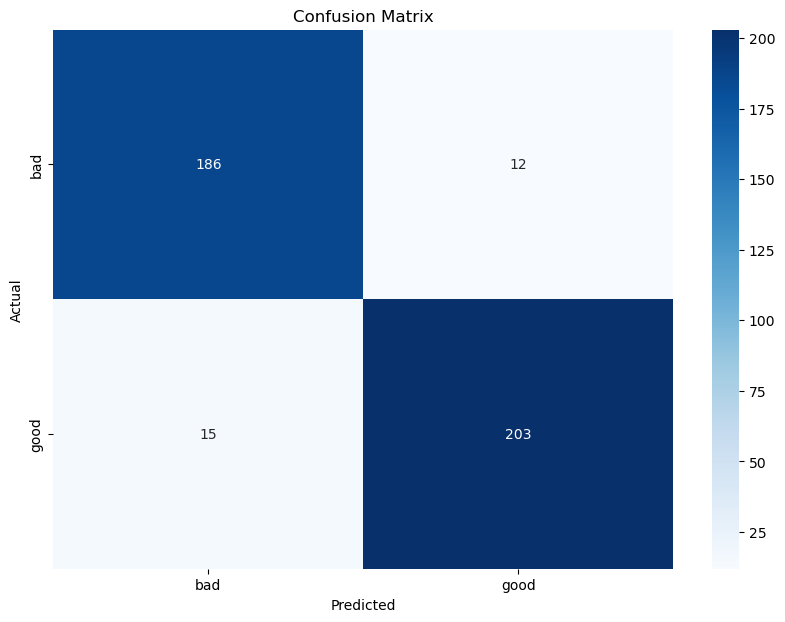

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()